<a href="https://colab.research.google.com/github/krimoe/Market_Basket_Optimisation-Unsupervised-Machine-Learning-Association-Rules-/blob/main/Market_Basket_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Market basket Optimisation****

In [ ]:
#Part1
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [ ]:
data = pd.DataFrame(dataset)#pour visualisation
data

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [ ]:
data = data.fillna(0)#pour visualisation
data

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,0,0
1,Sunglasses,Skirt,Sneakers,Pants,Hat,0,0
2,Dress,Sandals,Scarf,Pants,Heels,0,0
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,0


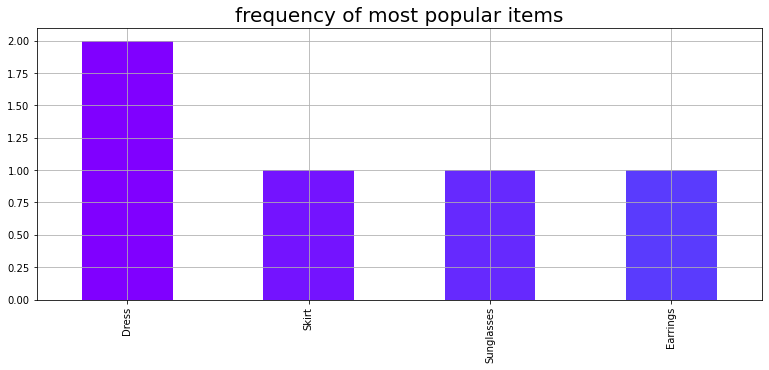

In [ ]:
#visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))#ça suppose que la première colonne contient le nom de tous les popular items, mais dans notre cas il est mieux de prendre comme référence la ligne la plus remplie (qui contient le moins de 0)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
#Apriori Preparation
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
df.columns

Index(['Dress', 'Earrings', 'Hat', 'Heels', 'Necklace', 'Pants', 'Sandals',
       'Scarf', 'Shirt', 'Skirt', 'Sneakers', 'Sunglasses'],
      dtype='object')

In [ ]:
#Support Code
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [ ]:
#Support with column names
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [ ]:
frequent_itemsets.max() #voir comment on peut afficher que les support max ? (for answer)

support                0.8
itemsets    (Pants, Skirt)
dtype: object

In [ ]:
#Confidence Code
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [ ]:
#Lift code
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [ ]:
#Part2
#on va utiliser une autre méthode pour market basket analysis celle vue dans le colab du cours Unsupervised Learning-Association Rules
data = pd.read_csv('/content/Market_Basket_Optimisation.csv',header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       7501 non-null   object
 2   2       7501 non-null   object
 3   3       7501 non-null   object
 4   4       7501 non-null   object
 5   5       7501 non-null   object
 6   6       7501 non-null   object
 7   7       7501 non-null   object
 8   8       7501 non-null   object
 9   9       7501 non-null   object
 10  10      7501 non-null   object
 11  11      7501 non-null   object
 12  12      7501 non-null   object
 13  13      7501 non-null   object
 14  14      7501 non-null   object
 15  15      7501 non-null   object
 16  16      7501 non-null   object
 17  17      7501 non-null   object
 18  18      7501 non-null   object
 19  19      7501 non-null   object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
data.shape

(7501, 20)

In [ ]:
transactions = []
for i in range(0, 7500):
    transactions.append([str(data.values[i,j]) for j in range(0, 19) if str(data.values[i,j])!='0'])

In [ ]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'miner

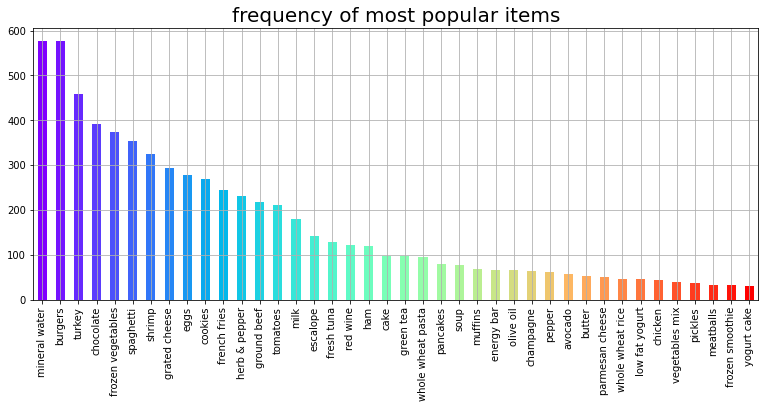

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))#ça suppose que la première colonne contient le nom de tous les items
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
#create an object of apriori function and set the threshold values for metrics
!pip install apyori
from apyori import apriori
rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
rules_list = list(rules)

In [ ]:
result = pd.DataFrame(rules_list)
result

,items,support,ordered_statistics
0,"(chicken, light cream)",0.004533,"[((light cream), (chicken), 0.2905982905982906..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005867,"[((pasta), (escalope), 0.37288135593220345, 4...."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(ground beef, herb & pepper)",0.016000,"[((herb & pepper), (ground beef), 0.3234501347..."
...,...,...,...
75,"(mineral water, olive oil, ground beef, spaghe...",0.003067,"[((olive oil, ground beef), (mineral water, sp..."
76,"(mineral water, ground beef, pancakes, spaghetti)",0.003067,"[((ground beef, pancakes), (mineral water, spa..."
77,"(mineral water, ground beef, tomatoes, spaghetti)",0.003067,"[((ground beef, tomatoes), (mineral water, spa..."
78,"(mineral water, milk, olive oil, spaghetti)",0.003333,"[((mineral water, milk, spaghetti), (olive oil..."


In [ ]:
result.ordered_statistics.iloc[0] # juste pour vérifier

[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]

In [ ]:
result.ordered_statistics.iloc[78] # juste pour vérifier

[OrderedStatistic(items_base=frozenset({'mineral water', 'milk', 'spaghetti'}), items_add=frozenset({'olive oil'}), confidence=0.21186440677966106, lift=3.2230893526317606)]

In [ ]:
#save support to a separate column
support = result.support

#all four empty lists will contain the items, confidence and lift respectively.
item1 = []
item2 = []
confidence = []
lift = []

#first and second item are frozensets and it has to be converted to a list
for i in range(result.shape[0]):
    list1 = result['ordered_statistics'][i][0]
    item1.append(list(list1[0]))
    item2.append(list(list1[1]))
    confidence.append(list1[2])
    lift.append(list1[3])

#convert the lists to dataframe
item_1 = pd.DataFrame(item1)
item_2 = pd.DataFrame(item2)
conf =pd.DataFrame(confidence,columns=['Confidence'])
lift_m = pd.DataFrame(lift,columns=['Lift'])

#concatenate the individual dataframes to a single dataframe
final_result = pd.concat([item_1,item_2,support,conf,lift_m], axis=1)

#fill the missing values
final_result = final_result.fillna(value=' ')

#rename the columns
final_result.columns = ['Item1','Item2','Item3','Item4','Item5','Support','Confidence','Lift']# essayer de savoir si il y a une méthode pour savoir le nbr de Item en avance 

In [ ]:
final_result

,Item1,Item2,Item3,Item4,Item5,Support,Confidence,Lift
0,light cream,,,chicken,,0.004533,0.290598,4.843305
1,mushroom cream sauce,,,escalope,,0.005733,0.300699,3.790327
2,pasta,,,escalope,,0.005867,0.372881,4.700185
3,fromage blanc,,,honey,,0.003333,0.245098,5.163582
4,herb & pepper,,,ground beef,,0.016000,0.323450,3.291555
...,...,...,...,...,...,...,...,...
75,olive oil,ground beef,,mineral water,spaghetti,0.003067,0.216981,3.632497
76,ground beef,pancakes,,mineral water,spaghetti,0.003067,0.211009,3.532520
77,ground beef,tomatoes,,mineral water,spaghetti,0.003067,0.261364,4.375507
78,mineral water,milk,spaghetti,olive oil,,0.003333,0.211864,3.223089
